# **Importing The Libraries**

In [59]:
#libraries for data handeling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#classifier libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data Collection & Preprocessing**

In [60]:
#loading the csv data to pandas data frame
gold_data = pd.read_csv('gold_price_data.csv')

In [61]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [62]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [85]:
rows, columns = gold_data.shape

print(f"The Number Of Rows : {rows}")
print(f"The Number Of Columns : {columns}")

The Number Of Rows : 2290
The Number Of Columns : 6


In [64]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [66]:
#getting the stastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Data Cleaning**

In [86]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [87]:
#checking for duplicate values
duplicate_values = gold_data[gold_data.duplicated]
duplicate_values

,Date,SPX,GLD,USO,SLV,EUR/USD


There is no duplicate or missing values in the dataset

# **Correlation:**

In [67]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [68]:
correlation = gold_data.corr()

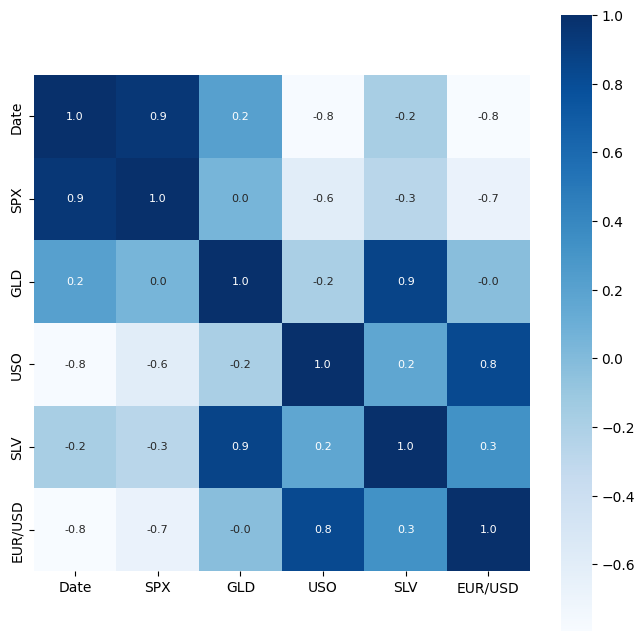

In [69]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [70]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# **Data Visulaization**

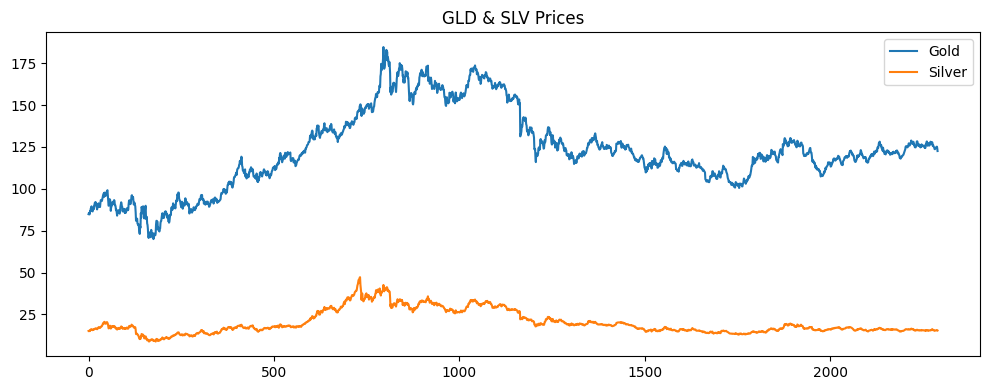

In [90]:
#plotting gold and silver prices
plt.figure(figsize=(10, 4))
gold_data['GLD'].plot()
gold_data['SLV'].plot()
plt.xlabel(None)
plt.ylabel(None)
plt.title("GLD & SLV Prices")
plt.legend(['Gold', 'Silver'])
plt.tight_layout()
plt.show()

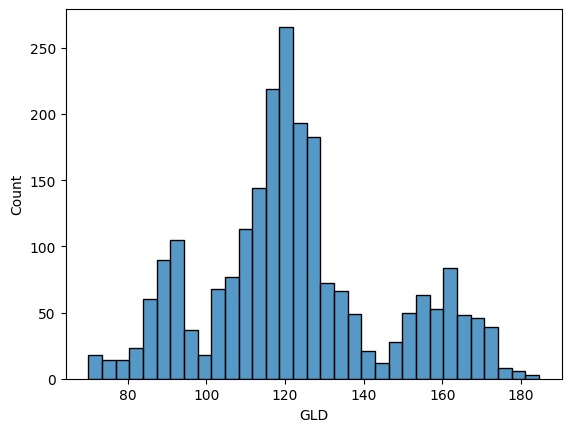

In [71]:
#checking the distribution of gold price
sns.histplot(gold_data['GLD'])
plt.show()

# **Spliting the Features and Target**

In [72]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [73]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [74]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# **Train Test Split**

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# **Model Training: Random Regression Forest**

In [76]:
regressor = RandomForestRegressor(n_estimators=100)

In [77]:
#training the model
regressor.fit(X_train , Y_train)

RandomForestRegressor()

# **Model Evaluation**

In [78]:
#predicting the test data
test_data_prediction = regressor.predict(X_test)

In [79]:
print(test_data_prediction)

[168.5733991   81.73869997 116.1996001  127.84160055 120.74740127
 154.82979687 150.47869895 126.08280046 117.50479888 126.06750069
 116.56620094 171.74680062 142.41479862 167.93119913 115.26740017
 117.63870066 138.10360291 170.07700096 159.86040276 158.99159886
 155.15860043 125.25410035 175.73839928 157.08410313 125.16530057
  93.92329997  77.61519996 120.65830002 119.06039924 167.50489942
  88.33180071 125.32550032  91.09340105 117.8885001  121.11229948
 136.45150056 115.60030143 115.33180097 147.80049923 107.08250105
 104.59100246  87.31879823 126.48220098 117.78540031 152.72709901
 119.5764002  108.36419983 108.07779867  93.27030068 127.18469757
  74.65060042 113.51449903 121.29839957 111.1664992  118.91319894
 120.52159954 159.48900032 167.39930068 147.31119705  85.78349843
  94.3493002   86.79769884  90.55150065 118.93430104 126.47680061
 127.55309995 170.0610995  122.26999943 117.41209892  98.63730039
 168.98230211 143.12909828 131.7419032  121.18510222 121.73719956
 119.89530

In [80]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.9889569424010413


# **Comparing the actual vs predicted values in a plot**

In [82]:
Y_test=list(Y_test)

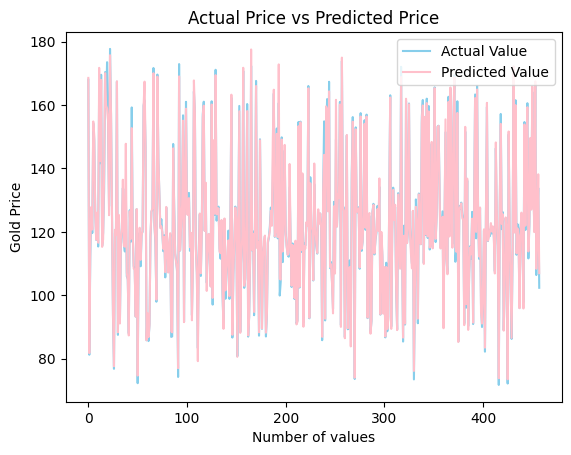

In [83]:
plt.plot(Y_test, color='skyblue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'pink', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend(loc = 'upper right')
plt.show()